# Main Library

In [2]:
# Reading Data & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Data Preprocessing & Feature Scailing & Encoder & Grid_Search
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Make SMOTE Over Smapling
# from imblearn.over_sampling import SMOTE

# Building model
from sklearn.linear_model import SGDRegressor # ==> l1 = (Lasso), l2 = (Ridge), ElisticNet
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

# Clustring 
from sklearn.cluster import KMeans

# XGBoost
import xgboost as xgb

# Neural Network ==> ANN, RNN(LSTM) 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN

# Warning To Remove Warning 
import warnings

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [4]:
class Machine_Learning():
    def __init__(self, path, target=None, test_data=None):
        self.data = pd.read_csv(path)
        self.target = target
        
        if test_data != None:
            self.test = pd.read_csv(test_data)
        
        self.model_Evaluation = []
        
        self.col_drop=[]
        
        
    # ------------------------------------------------------------------------------------------ #

    # Function To Reading Data
    def Reading_Data(self):
        
        self.data.head(5)
        
        return self.data
    
    # ------------------------------------------------------------------------------------------ #

    
    # Function To Show Describtion For Data
    def Statstic_information(self, data):
        
        return data.describe
        
        
        
    # ------------------------------------------------------------------------------------------ #

    
    # Function To Choise Columns i Will Drop & Showing Information Data 
    def Drop_Columns_Increase(self, data):
        columns = ["ID", "Id", "name", "Name", "Adress", "Data", "cabin"]
    
        print("Name of columns: \n")

        for i in data.columns:
            for j in columns:
                if j in str(i) and i not in self.col_drop:
                    self.col_drop.append(i)

        self.col_drop = list(set(self.col_drop))

        print()
        print("------------------")
        print()


        print(data.info())

        return data
    
    # ------------------------------------------------------------------------------------------ #

    
    # Drop The Columns
    def Drop_columns(self, data):
        if len(self.col_drop) > 0:
            for i in self.col_drop:
                print(i)
                data.drop(columns=i, axis=1, inplace=True)


        for i, j in enumerate(data.isnull().sum()[0:]):
            if j >= data.shape[0]//2:
                print(data.isnull().sum().index[i])
                data.drop(columns=data.isnull().sum().index[i], axis=1, inplace=True)

        return data
    
    # ------------------------------------------------------------------------------------------ #
    
    # Filling The None Value 
    def Filling_data(self, data):
        for col in data.isnull().sum().index:
            if data[col].dtype == "O":
                data[col].fillna(data[col].value_counts().index[0], inplace=True)
            else:
                data[col].fillna(data[col].median(), inplace=True)
                
        print(data.isnull().sum())

        return data
    
    
    # ------------------------------------------------------------------------------------------ #

    
    # Function To Showing HeatMap To Visualize Correliation Between Columns 
    def Analysis_HeatMap(self, data):
        print("------------- Heat Map For Data ------------ ")

        plt.figure(figsize=(10, 10))
        sns.heatmap(data.corr(), square=True, cmap="Blues", cbar=True, fmt="0.1f", annot=True)
        plt.show()
        
        return 
    
    # ------------------------------------------------------------------------------------------ #

    
    # Function To Showing Histogram To All Columns
    def Histogram_Hisplot(self, data):

        print("------------- Histogram And Distplot For Data ------------ \n")

        plt.figure(figsize=(5, 5))
        sns.histplot(data)         
        plt.show()

        return
    
    # ------------------------------------------------------------------------------------------ #

    
    # Function To Visualize Denisty
    def Histogram_Histplot_Density(self, data):

        print("------------- Histogram And Distplot For Data ------------ \n")

        x = [col for col in data.columns if len(data[col].value_counts()) > 50]

        for i, col in enumerate(x):
            plt.figure(figsize=(5, 5))
            sns.distplot(data[col]);
            
        plt.show()

        return
    
    # ------------------------------------------------------------------------------------------ #
    
    # Function To make PairPlot ==> Visualize Relation Between columns 
    
    def Pair_Plot(self, data, *col):       
        col = list(col)
        sns.pairplot(data[col])
        plt.show()
        return
    
    
    # ------------------------------------------------------------------------------------------ #

    
    # Function To Visualize Outliear

    def Box_plot(self, data):
        
        print("------------- Box Plot For Data ------------ \n")

        data.boxplot(figsize=(10, 10))
        plt.show()
        
        return
    
    
    # ------------------------------------------------------------------------------------------ #

    
    # Make Label Encoder To Data
    def Make_Label_Encoder(self, data):
        object_element = data.select_dtypes(include=["object"])

        La = LabelEncoder()

        for col in object_element.columns:
            data[col] = La.fit_transform(data[col])


        return data
    
    
    
    # ------------------------------------------------------------------------------------------ #

    
    # Make One Hot Encoder To Data
    def Make_OneHotEncoder(self, data):
    
        object_element = data.select_dtypes(include=["object"])

        for col in object_element.columns:
            if col == self.targeta:
                
                data[col] = LabelEncoder().fit_transform(data[col])
                continue
                
            x = data[col].unique()
            y = data[col].values
            new_col = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()
            for i, j in enumerate(x):
                data[x] = new_col[i]

            data.drop(columns=col, axis=1, inplace=True)

        return data
    
    
    # ---------------------------- _ Feature Engineering _---------------------------------------------------#
    
    
    
    # ------------------------------------------------------------------------------------------ #
    
    # To Make Ratio Between To Columns 
    def Make_Ratio_col1_col2(self, data, col1, col2, new_name):
        
        data[new_name] = data[col1] / data[col2]
        
        return data
    
    
    # ------------------------------------------------------------------------------------------ #
    
    # This Function To Avoid Sheweked Data 
    def Make_LogTransform(self, data, *col):
        for i in col:
            data[i] = np.log(data[i])
        return data
    
    # ------------------------------------------------------------------------------------------ #
    
        
    # To Make multiblication Between To Columns 
    def Make_mul_col1_col2(self, data, col1, col2, new_name):
        
        data[new_name] = data[col1] * data[col2]
        
        return data

    
    

In [5]:
class Build_Model_Supervised_ML(Machine_Learning):
    
    # Make Over Sampling For Data
    def Make_OverSampling(self, data):
        print("Please Make OverSampling In Classification Data With 2 or More value in Target")
        X_input = data.drop(columns=self.target, axis=1)
        Y_output = data[self.target]
        
        print(data[data[self.target] == 0].shape[0], data[data[self.target] == 1].shape[0])

        new_x, new_y =  SMOTE().fit_resample(X_input, Y_output)

        data = pd.concat([new_x, new_y], axis=1)

        print(data[data[self.target] == 0].shape[0], data[data[self.target] == 1].shape[0])

        return data
        
    # ------------------------------------------------------------------------------------------ #
        

    
    # Function To Make Standerdiztion For Data  
    def Feature_Scalling(self, data):
        
        X_input = data.drop(columns=self.target, axis=1)
        Y_output = data[self.target]
        
        scaler = StandardScaler()
        scaler.fit(X_input)
        X_input = scaler.transform(X_input)

        x_train, x_test, y_train, y_test = train_test_split(X_input, Y_output, train_size=0.7, random_state=42)
        
        return x_train, x_test, y_train, y_test
    
    # ------------------------------------------------------------------------------------------ #
    
    
    # Function To Make Normalization Data Anf Make Range All Colunms Between 0, 1
    def Feature_Scalling_MinMax(self, data):
        
        X_input = data.drop(columns=self.target, axis=1)
        Y_output = data[self.target]
        
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_input = scaler.fit_transform(X_input)

        x_train, x_test, y_train, y_test = train_test_split(X_input, Y_output, train_size=0.7, random_state=42)
        
        return x_train, x_test, y_train, y_test
    
    # ------------------------------------------------------------------------------------------ #
    
    # Function To Prediction New Data
    def Make_Cross_Validation(self, data, x_train, y_train):
        if len(data[self.target].value_counts()) <= 10:
            
            print("---------------^ The Model Is Classification ^--------------------- \n")
                        
            input_model = int(input("Please Enter The Model I To Make Feature Importance==>: [model_RF== 0, model_AD==1, model_xgb==2]"))
            
            model_RF, model_AD, model_xgb = self.Model_Classification_Algorithms(x_train, x_test, y_train, y_test, The_Best_model)
            
            model = {0:model_RF, 1:model_AD, 2:model_xgb}
            
            model_CV = cross_val_score(estimator=model[input_model], X=x_train, y=y_train, 
                                      cv=10, 
                                      n_jobs=-1,
                                      scoring="accuracy")
            
            print(f"The Mean Accuracy is ==> {model_CV.mean()}")
            print(f"The Max Score is ==> {model_CV.max()}")
            
                    
        
        else:
            print("--------------- ^ The Model Is Regression ^------------------------ \n")
            
            print("No Cross_Validatoin in Regression Only In Classification")
    
    
    
    # =================================================================================================

    
    
    # Function To Building Classification Model 
    def Model_Classification_Algorithms(self, x_train, x_test, y_train, y_test):
        
        # Model1==> RandomForestClassifier
        model_RF = RandomForestClassifier(n_estimators=10, max_depth=5)
        model_RF.fit(x_train, y_train)


        train_acc_RF = f"The Accuracy Score Of Train Model in -RandomForest- is {model_RF.score(x_train, y_train)} "
        test_acc_RF = f"The Accuracy Score Of Test Model in -RandomForest- is {model_RF.score(x_test, y_test)} "

        self.model_Evaluation.append([train_acc_RF, test_acc_RF])


        # -------------------------------------------------------------------------

        # Model2 ==> AdaBoostClassifier
        model_AD = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=50, 
                                                                            min_samples_split=6,
                                                                            min_samples_leaf=5),
                                      n_estimators=100,
                                      learning_rate=0.01)


        model_AD.fit(x_train, y_train)



        train_AD = f"The predict Score Train in -AdaBoostClassifier- is ==> {model_AD.score(x_train, y_train)}"
        test_AD = f"The predict Score Test in -AdaBoostClassifier- is ==> {model_AD.score(x_test, y_test)}"

        self.model_Evaluation.append([train_AD, test_AD])
        

        # ---------------------------------------------------------------------

        # Model3 ==> XGBClassifier
        model_xgb = xgb.XGBClassifier(n_estimators=10, max_depth=5)


        model_xgb.fit(x_train, y_train)

    
        train_xgbC = f"The predict Score Train in -XGBClassifier- is ==> {model_xgb.score(x_train, y_train)}"
        test_xgbC = f"The predict Score Test in -XGBClassifier- is ==> {model_xgb.score(x_test, y_test)}"

        self.model_Evaluation.append([train_xgbC, test_xgbC])


        return model_RF, model_AD, model_xgb
    
    
    # -------------------------------------------------------------------------------------------------------#
    # Function To Get The Best Param IN Model
    
    def Grid_search(self, data):
        if len(data[self.target].value_counts()) <= 10:
            
            print("---------------^ The Model Is Classification ^--------------------- \n")
                        
            input_model = int(input("Please Enter The Model I To Make Grid_search==>: [model_RF== 0, model_xgb==1]"))
            
            model_RF, _, model_xgb = self.Model_Classification_Algorithms(x_train, x_test, y_train, y_test, The_Best_model)
            
            model = {0:RandomForestClassifier, 1:xgb.XGBClassifier}
            
            param_grid = {"n_estimators": list(range(10, 200, 20)),
                          "max_depth": list(range(10, 100, 20)),
                          "max_leaf_nodes": list(range(10, 100, 20))}
            
            model_Grid = GridSearchCV(estimator=model[input_model](), 
                          param_grid=param_grid, 
                          cv=5, verbose=6, 
                          return_train_score=True,
                          n_jobs=-1)
            model_Grid.fit(x_train, y_train)
            
            print("-" * 50)
            
            print(f"The Best Param is {model_Grid.best_params_}")
            
            print("-" * 50)
            
            print(f"The Accuracy Training Data is {model_Grid.score(x_train, y_train)}")
            print(f"The Accuracy Testing Data is {model_Grid.score(x_test, y_test)}")
            
                    
        
        else:
            print("--------------- ^ The Model Is Regression ^------------------------ \n")
            
            data = data.drop(columns=self.target, axis=1)

            model_RFR, _, model_xgb = self.Model_Regression_Algorithms(x_train, x_test, y_train, y_test)
            
            input_model = int(input("Please Enter The Model I To Make Grid_search==>: [model_RFR== 0, model_xgb==1]"))
            
            model = {0:RandomForestRegressor, 1:xgb.XGBRegressor}
            
            param_grid = {"n_estimators": list(range(10, 200, 20)),
                          "max_depth": list(range(10, 100, 20)),
                          "max_leaf_nodes": list(range(10, 100, 20))}
            
            model_Grid = GridSearchCV(estimator=model[input_model](), 
                          param_grid=param_grid, 
                          cv=5, verbose=6, 
                          return_train_score=True,
                          n_jobs=-1)
            model_Grid.fit(x_train, y_train)
            
            print("-" * 50)
            
            print(f"The Best Param is {model_Grid.best_params_}")
            
            print("-" * 50)
            
            print(f"The Accuracy Training Data is {model_Grid.score(x_train, y_train)}")
            print(f"The Accuracy Testing Data is {model_Grid.score(x_test, y_test)}")
            
        
    
    
    
    
    # -------------------------------------------------------------------------------------------------------#
    
    # Function To Building Regression Model 
    def Model_Regression_Algorithms(self, x_train, x_test, y_train, y_test):
    
        # Model1 ==> SGD
        model_SGD = SGDRegressor(penalty="l2", max_iter=1000)
        model_SGD.fit(x_train, y_train)

        train_SGD = f"The predict Score Train in -SGD- is ==> {model_SGD.score(x_train, y_train)}"
        test_SGD = f"The predict Score Test in -SGD- is ==> {model_SGD.score(x_test, y_test)}"

        self.model_Evaluation.append([train_SGD, test_SGD])

        # --------------------------------------------------------------------------------

        # Model2 ==> RandomForestRegressor
        model_RFR = RandomForestRegressor(n_estimators=100, max_depth=20)
        model_RFR.fit(x_train, y_train)


        train_acc_RF = f"The Accuracy Score Of Train Model in -RandomForestRegressor- is {model_RFR.score(x_train, y_train)} "
        test_acc_RF = f"The Accuracy Score Of Test Model in -RandomForestRegressor- is {model_RFR.score(x_test, y_test)} "

        self.model_Evaluation.append([train_acc_RF, test_acc_RF])


        # --------------------------------------------------------------------------------

        # Model3 ==> XGBRegressor
        model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=20,
                                         learning_rate=0.2)

        model_xgb.fit(x_train, y_train)


        train_xgbR = f"The predict Score Train in -XGBRegressor- is ==> {model_xgb.score(x_train, y_train)}"
        test_xgbR = f"The predict Score Test in -XGBRegressor- is ==> {model_xgb.score(x_test, y_test)}"

        self.model_Evaluation.append([train_xgbR, test_xgbR])

        return model_RFR, model_SGD, model_xgb
    
        # --------------------------------------------------------------------------------

    
    # Function To Showing Accuracy All Model
    def Evalution_data(self, data,  x_train, x_test, y_train, y_test):

        if len(data[self.target].value_counts()) <= 10:
            print("---------------^ The Model Is Classification ^--------------------- \n")
            

            self.Model_Classification_Algorithms(x_train, x_test, y_train, y_test)

        else:
            print("--------------- ^ The Model Is Regression ^------------------------ \n")

            self.Model_Regression_Algorithms(x_train, x_test, y_train, y_test)

        for i, j in self.model_Evaluation:
            print(i)
            print(j)
            print("\n------------------------------ \n")
            
        return 
    
    
    # ------------------------------------------------------------------------------------------ #
    
    
    # Function To Make Artifiale Neural Network For Classification
    def Make_NeuralNetwork_Classification(self, data, x_train, x_test, y_train, y_test):
        if len(data[self.target].value_counts()) <= 10:
            
            print("---------------^ The Model Is Neural Network ^--------------------- \n")
            
            model = tf.keras.models.Sequential([
                
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512, activation=tf.nn.relu),
                tf.keras.layers.Dense(128, activation=tf.nn.relu),
                tf.keras.layers.Dense(32, activation=tf.nn.relu),
                tf.keras.layers.Dense(8, activation=tf.nn.relu),
                tf.keras.layers.Dense(len(list(set(y_train))), activation=tf.nn.softmax)
                
            ])

            model.compile(optimizer="Nadam", 
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                          metrics=["accuracy"])

            history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))


            print("\n" ,"-"*50, "\n")

            loss, accuracy = model.evaluate(x_test, y_test)

            print("\n" ,"-"*50, "\n")

            testing_acc = f"The predict Score Testing  in -Neural Network- is ==> {accuracy}"
            testing_loss = f"The predict Testing Loss in -Neural Network- is ==> {loss}"


            print(testing_acc)
            print(testing_loss)
            
            
            # ------------------------------------------------------------------------------------------ #

            
            plt.plot(history.history["accuracy"], label="Accuracy")
            plt.plot(history.history["val_accuracy"], label="val_Accuracy")
            plt.title("Accuracy Vs Epochs ==> ANN")
            plt.xlabel("EPOCHS")
            plt.ylabel("Accuracy")
            plt.legend()
            plt.grid()
            plt.show()
            
            
            # ------------------------------------------------------------------------------------------ #

            
            print("-" * 50)
            plt.plot(history.history["loss"], label="loss")
            plt.plot(history.history["val_loss"], label="val_loss")
            plt.title("loss Vs Epochs ==> ANN")
            plt.xlabel("EPOCHS")
            plt.ylabel("Loss")
            plt.legend()
            plt.grid()
            plt.show()
        return 
    
    
    
    # Function To Make Artifiale Neural Network For Regression
    def Make_NeuralNetwork_Regression(self, data, x_train, x_test, y_train, y_test):
        if len(data[self.target].value_counts()) > 10:
            
            print("---------------^ The Model Is Neural Network ^--------------------- \n")
            
            x_train = tf.keras.utils.normalize(x_train, axis=1)
            x_test = tf.keras.utils.normalize(x_test, axis=1)

            # Create the model
            model = tf.keras.Sequential([
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dense(1, activation='linear')
            ])

            # Compile the model
            model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

            # Train the model
            history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))


            print("\n" ,"-"*50, "\n")

            loss, mae = model.evaluate(x_test, y_test)

            print("\n" ,"-"*50, "\n")

            testing_acc = f"The predict mae Testing  in -Neural Network- is ==> {mae}"
            testing_loss = f"The predict Testing Loss in -Neural Network- is ==> {loss}"


            print(testing_acc)
            print(testing_loss)
            
            
            # ------------------------------------------------------------------------------------------ #

            
            plt.plot(history.history["mae"], label="mae")
            plt.plot(history.history["val_mae"], label="val_mae")
            plt.title("MAE Vs Epochs ==> ANN")
            plt.xlabel("EPOCHS")
            plt.ylabel("MAE")
            plt.legend()
            plt.grid()
            plt.show()
            
            
            # ------------------------------------------------------------------------------------------ #

            
            print("-" * 50)
            plt.plot(history.history["loss"], label="loss")
            plt.plot(history.history["val_loss"], label="val_loss")
            plt.title("LOSS(MSE) Vs EPOCHS ==> ANN")
            plt.xlabel("EPOCHS")
            plt.ylabel("LOSS(MSE)")
            plt.legend()
            plt.grid()
            plt.show()
            
        return 
    
    
    # ------------------------------------------------------------------------------------------ #
    
    
    
    # Function To Make Recurrent Neural Network(LSTM) For Classification
    def Make_NeuralNetwork_LSTM_Classification(self, data, x_train, x_test, y_train, y_test):
        
        if len(data[self.target].value_counts()) <= 10:
            
            print("---------------^ The Model Is Neural Network ^--------------------- \n")
            
            model_LSTM = Sequential()

            model_LSTM.add(LSTM(units=64, activation="relu", return_sequences=True, input_shape=(x_train.shape[1], 1)))
#             model_LSTM.add(Dropout(0.2))

            model_LSTM.add(LSTM(units=64, activation="relu", return_sequences=True))
#             model_LSTM.add(Dropout(0.2))

            model_LSTM.add(LSTM(units=64, activation="relu", return_sequences=True))
#             model_LSTM.add(Dropout(0.2))

            model_LSTM.add(LSTM(units=3, activation="softmax"))

            model_LSTM.compile(optimizer=tf.keras.optimizers.Nadam(), 
                               loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                               metrics="accuracy")

            print("\n" ,"-"*50, "\n")
            
            history = model_LSTM.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

            loss, accuracy = model_LSTM.evaluate(x_test, y_test)

            print("\n" ,"-"*50, "\n")

            testing_acc = f"The predict Score Testing  in -Neural Network- is ==> {accuracy}"
            testing_loss = f"The predict Testing Loss in -Neural Network- is ==> {loss}"


            print(testing_acc)
            print(testing_loss)
            
            
            # ------------------------------------------------------------------------------------------ #

            
            plt.plot(history.history["accuracy"], label="Accuracy")
            plt.plot(history.history["val_accuracy"], label="val_Accuracy")
            plt.title("Accuracy Vs Epochs ==> LSTM")
            plt.xlabel("EPOCHS")
            plt.ylabel("Accuracy")
            plt.legend()
            plt.grid()
            plt.show()
            
            
            # ------------------------------------------------------------------------------------------ #

            
            print("-" * 50)
            plt.plot(history.history["loss"], label="loss")
            plt.plot(history.history["val_loss"], label="val_loss")
            plt.title("loss Vs Epochs ==> LSTM")
            plt.xlabel("EPOCHS")
            plt.ylabel("Loss")
            plt.legend()
            plt.grid()
            plt.show()
            
        return
    
    
    # --------------------------------------------------------------------------------------------------- #

    
    
    # Function To Make Recurrent Neural Network(LSTM) For Regression
    def Make_NeuralNetwork_LSTM_Regression(self, data, x_train, x_test, y_train, y_test):
        
        if len(data[self.target].value_counts()) >= 10:
            
            print("---------------^ The Model Is Neural Network ^--------------------- \n")
            
            model_LSTM = Sequential()

            model_LSTM.add(LSTM(units=64, activation="relu", return_sequences=True, input_shape=(x_train.shape[1], 1)))
            model_LSTM.add(Dropout(0.2))

            model_LSTM.add(LSTM(units=64, activation="relu", return_sequences=True))
            model_LSTM.add(Dropout(0.2))

            model_LSTM.add(LSTM(units=64, activation="relu", return_sequences=True))
            model_LSTM.add(Dropout(0.2))

            model_LSTM.add(LSTM(units=1, activation="linear"))

            model_LSTM.compile(optimizer=tf.keras.optimizers.Nadam(), 
                               loss=tf.keras.losses.mean_squared_error, 
                               metrics="mae")

            print("\n" ,"-"*50, "\n")
            
            history = model_LSTM.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

            loss, mae = model_LSTM.evaluate(x_test, y_test)

            print("\n" ,"-"*50, "\n")

            testing_acc = f"The predict Mean_Absloute Error Testing  in -Neural Network- is ==> {mae}"
            testing_loss = f"The predict Testing Loss in -Neural Network- is ==> {loss}"


            print(testing_acc)
            print(testing_loss)
            
            
            # ------------------------------------------------------------------------------------------ #

            
            plt.plot(history.history["mae"], label="mae")
            plt.plot(history.history["val_mae"], label="val_mae")
            plt.title("MAE Vs Epochs ==> LSTM")
            plt.xlabel("EPOCHS")
            plt.ylabel("MAE")
            plt.legend()
            plt.grid()
            plt.show()
            
            
            # ------------------------------------------------------------------------------------------ #

            
            print("-" * 50)
            plt.plot(history.history["loss"], label="loss")
            plt.plot(history.history["val_loss"], label="val_loss")
            plt.title("loss Vs Epochs ==> LSTM")
            plt.xlabel("EPOCHS")
            plt.ylabel("Loss")
            plt.legend()
            plt.grid()
            plt.show()
            
        return
    
    # --------------------------------------------------------------------------------------------------#
    
    
    # Function To Make Recurrent Neural Network(LSTM) For Classification
    def Make_NeuralNetwork_RNN_Classification(self, data, x_train, x_test, y_train, y_test):
        
        if len(data[self.target].value_counts()) <= 10:
            
            print("---------------^ The Model Is Neural Network ^--------------------- \n")
            
            x_train, x_test = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)), np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
            
            model_RNN = Sequential()

            model_RNN.add(SimpleRNN(128, activation="relu"))

            model_RNN.add(Dense(units=64, activation="tanh"))

            model_RNN.add(Dense(units=32, activation="relu"))

            model_RNN.add(Dense(units=len(list(set(y_train))), activation="softmax"))

            model_RNN.compile(optimizer=tf.keras.optimizers.Nadam(), 
                               loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                               metrics="accuracy")

            print("\n" ,"-"*50, "\n")
            
            history = model_RNN.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

            loss, accuracy = model_RNN.evaluate(x_test, y_test)

            print("\n" ,"-"*50, "\n")

            testing_acc = f"The predict Score Testing  in -Neural Network- is ==> {accuracy}"
            testing_loss = f"The predict Testing Loss in -Neural Network- is ==> {loss}"


            print(testing_acc)
            print(testing_loss)
            
            
            # ------------------------------------------------------------------------------------------ #

            
            plt.plot(history.history["accuracy"], label="Accuracy")
            plt.plot(history.history["val_accuracy"], label="val_Accuracy")
            plt.title("Accuracy Vs Epochs ==> RNN")
            plt.xlabel("EPOCHS")
            plt.ylabel("Accuracy")
            plt.legend()
            plt.grid()
            plt.show()
            
            
            # ------------------------------------------------------------------------------------------ #

            
            print("-" * 50)
            plt.plot(history.history["loss"], label="loss")
            plt.plot(history.history["val_loss"], label="val_loss")
            plt.title("loss Vs Epochs ==> RNN")
            plt.xlabel("EPOCHS")
            plt.ylabel("Loss")
            plt.legend()
            plt.grid()
            plt.show()
            
        return
    
    
    # --------------------------------------------------------------------------------------------------- #

    
    
    # Function To Make Recurrent Neural Network(LSTM) For Regression
    def Make_NeuralNetwork_RNN_Regression(self, data, x_train, x_test, y_train, y_test):
        
        if len(data[self.target].value_counts()) >= 10:
            
            print("---------------^ The Model Is Neural Network ^--------------------- \n")
            
            x_train, x_test = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)), np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
            
            model_RNN = Sequential()

            model_RNN.add(SimpleRNN(128, activation="relu"))

            model_RNN.add(Dense(units=64, activation="tanh"))

            model_RNN.add(Dense(units=32, activation="relu"))
            
            model_RNN.add(Dense(units=32, activation="tanh"))


            model_RNN.add(Dense(units=1, activation="linear"))

            model_RNN.compile(optimizer=tf.keras.optimizers.Nadam(), 
                              loss="mse", 
                              metrics="mae")

            print("\n" ,"-"*50, "\n")
            
            history = model_RNN.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

            loss, mae = model_RNN.evaluate(x_test, y_test)

            print("\n" ,"-"*50, "\n")

            testing_acc = f"The predict Mean_Absloute Error Testing  in -Neural Network- is ==> {mae}"
            testing_loss = f"The predict Testing Loss in -Neural Network- is ==> {loss}"


            print(testing_acc)
            print(testing_loss)
            
            
            # ------------------------------------------------------------------------------------------ #

            
            plt.plot(history.history["mae"], label="mae")
            plt.plot(history.history["val_mae"], label="val_mae")
            plt.title("MAE Vs Epochs ==> RNN")
            plt.xlabel("EPOCHS")
            plt.ylabel("MAE")
            plt.legend()
            plt.grid()
            plt.show()
            
            
            # ------------------------------------------------------------------------------------------ #

            
            print("-" * 50)
            plt.plot(history.history["loss"], label="loss")
            plt.plot(history.history["val_loss"], label="val_loss")
            plt.title("loss Vs Epochs ==> RNN")
            plt.xlabel("EPOCHS")
            plt.ylabel("Loss")
            plt.legend()
            plt.grid()
            plt.show()
            
        return
    
    
    
    
    # ------------------------------------------------------------------------------------------------------------ #

    
    
    # Function To Prediction New Data
    def Make_Prediction(self, data):
        if len(data[self.target].value_counts()) <= 10:
            
            print("---------------^ The Model Is Classification ^--------------------- \n")
                        
            input_model = int(input("Please Enter The Model I To Make Feature Importance==>: [model_RF== 0, model_AD==1, model_xgb==2]"))
            
            model_RF, model_AD, model_xgb = self.Model_Classification_Algorithms(x_train, x_test, y_train, y_test, The_Best_model)
            
            model = {0:model_RF, 1:model_AD, 2:model_xgb}
            
            Prediction = model[input_model].predict(data)
            
            Prediction = pd.DataFrame({"Prediction" : Prediction})
            
            return Prediction
                    
        
        else:
            print("--------------- ^ The Model Is Regression ^------------------------ \n")
            
            data = data.drop(columns=self.target, axis=1)

            model_RFR, model_SGD, model_xgb = self.Model_Regression_Algorithms(x_train, x_test, y_train, y_test)
            
            input_model = int(input("Please Enter The Model I To Make Feature Importance==>: [model_RFR== 0, model_SGD==1, model_xgb==2]"))
            
            model = {0:model_RFR, 1:model_SGD, 2:model_xgb}
            
            Prediction = model[input_model].predict(data)
            
            Prediction = pd.DataFrame({"Prediction" : Prediction})
            
            return Prediction
            
        
        
        
    # ------------------------------------------------------------------------------------------ #
    
    
    # Function To Visualize Feature Importance(Corr) Between All Columns And Target  
    def Make_FeatureImportance(self, data):
        
        
        if len(data[self.target].value_counts()) <= 10:
            print("---------------^ The Model Is Classification ^--------------------- \n")
            
            data = data.drop(columns=self.target, axis=1)
            
            input_model = int(input("Please Enter The Model I To Make Feature Importance==>: [model_RF== 0, model_AD==1, model_xgb==2]"))
            
            model_RF, model_AD, model_xgb = self.Model_Classification_Algorithms(x_train, x_test, y_train, y_test)
            model = {0:model_RF, 1:model_AD, 2:model_xgb}
            
            s = list(model[input_model].feature_importances_)
            feature_model = {}
            for i, j in enumerate(data.columns):
                feature_model[j] = s[i]

            feature_key = feature_model.keys()
            feature_score = feature_model.values()

            df_feature = pd.DataFrame({"Feature":feature_key, "SCORE":feature_score})
            
            plt.figure(figsize=(10, 5))
            plt.bar(x=df_feature["Feature"], height=df_feature["SCORE"])
            plt.title("Feature Importance Between Feature And Target")
            plt.xlabel("Feature Name")
            plt.ylabel("SCORE")
            plt.grid()
            plt.show()
            
            return 
            
                
        else:
            print("--------------- ^ The Model Is Regression ^------------------------ \n")
            
            data = data.drop(columns=self.target, axis=1)

            model_RFR, model_SGD, model_xgb = self.Model_Regression_Algorithms(x_train, x_test, y_train, y_test)
            input_model = int(input("Please Enter The Model I To Make Feature Importance==>: [model_RFR== 0, model_SGD==1, model_xgb==2]"))
            model = {0:model_RFR, 1:model_SGD, 2:model_xgb}
            
            
            s = list(model[input_model].feature_importances_)
            feature_model = {}
            for i, j in enumerate(data.columns):
                feature_model[j] = s[i]

            feature_key = feature_model.keys()
            feature_score = feature_model.values()

            df_feature = pd.DataFrame({"Feature":feature_key, "SCORE":feature_score})
            
            plt.figure(figsize=(10, 5))
            plt.bar(x=df_feature["Feature"], height=df_feature["SCORE"])
            plt.title("Feature Importance Between Feature And Target")
            plt.xlabel("Feature Name")
            plt.ylabel("SCORE")
            plt.grid()
            plt.show()
            
            return

In [6]:
class Build_Model_UnSupervised_ML(Machine_Learning):
    
    
    # Function To Make Scalling ==> Data  
    def Feature_Scalling(self, data):
        
        scaler = StandardScaler()
        scaler.fit(data)
        data = scaler.transform(data)
        
        return data
    
    # ------------------------------------------------------------------------------------------ #
    
    # Make PCA To Reduce Feature And Dimeantion 
    def PCA(self, data, n_columns=2):
        
        print(f"The Dimaintion Reduce From {len(data.columns)} To ==> {n_columns}")
        
        pca = PCA(n_components=n_columns)
        
        new_Data = pca.fit_transform(data)
        
        return new_Data
    
    
    # ------------------------------------------------------------------------------------------ #
    
    # Make Clutering And Showing Relation Between Number Of Cluster And Cost Function
    def Make_Clustring_For_Data(self, data, n_cluster):
        n_group = []
        cost = []
        for i in range(1, n_cluster):
            model = KMeans(n_clusters=i)
            model.fit(data)
            
            n_group.append(i)
            cost.append(model.inertia_)
            
        plt.plot(n_group, cost, 
                 marker="o",
                 c="green", 
                 linestyle=":", 
                 markerfacecolor="red", 
                 markersize=10, 
                 markeredgewidth=0.01)
        plt.grid()
        plt.show()
        
        return
    
    
    # Make Clutering And Showing Group Of Cluster
    def visualize_Cluster_data(self, data, col1=None, col2=None, num_cluster=5):
        try:
            new_Data = data.iloc[:, col1:col2].values
        except:
            new_Data = data
        
        Kmeans = KMeans(n_clusters=num_cluster, init="k-means++", random_state=0)

        Y = Kmeans.fit_predict(new_Data)
        
        plt.figure(figsize=(8, 8))
        
        color = ["green", "black", "red", "blue", "yellow", "brown", "orange",
                 "cyan", "gray", "pink", "magenta", "peru", "gold", "teal", "fuchsia", "orchid"]
        
        for i in range(num_cluster):
            plt.scatter(new_Data[Y==i,0], new_Data[Y==i,1], s=50, c=color[i], label=f"cluster {i+1}")

        plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:, 1], s=100, c="cyan", label="centroids")
        plt.grid()
        plt.legend()

        plt.show()
        
        return

In [7]:
path = r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Vehicle_DataSet\car data.csv"
test = None
target = "Selling_Price"

# path = r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Training_Data_set_For_ML\Iris.csv"
# target = "label"


# path = r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\house-prices-advanced-regression-techniques\train.csv"
# test = r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\house-prices-advanced-regression-techniques\test.csv"
# target = "SalePrice"

model = Build_Model_Supervised_ML(path=path, target=target, test_data=test)

In [8]:
data = model.Reading_Data()

# test = model.Reading_Data()

data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
print(model.Statstic_information(data))

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

In [10]:
data = model.Drop_Columns_Increase(data)

# test = model.Drop_Columns_Increase(test)

Name of columns: 


------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [11]:
data = model.Drop_columns(data)

# test = model.Drop_columns(test)


data

Car_Name


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
data = model.Filling_data(data)

# test = model.Filling_data(test)


test

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [13]:
# data = model.Make_OneHotEncoder(data)


# data

In [14]:
data = model.Make_Label_Encoder(data)


data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0
297,2015,4.00,5.90,60000,2,0,1,0
298,2009,3.35,11.00,87934,2,0,1,0
299,2017,11.50,12.50,9000,1,0,1,0


------------- Heat Map For Data ------------ 


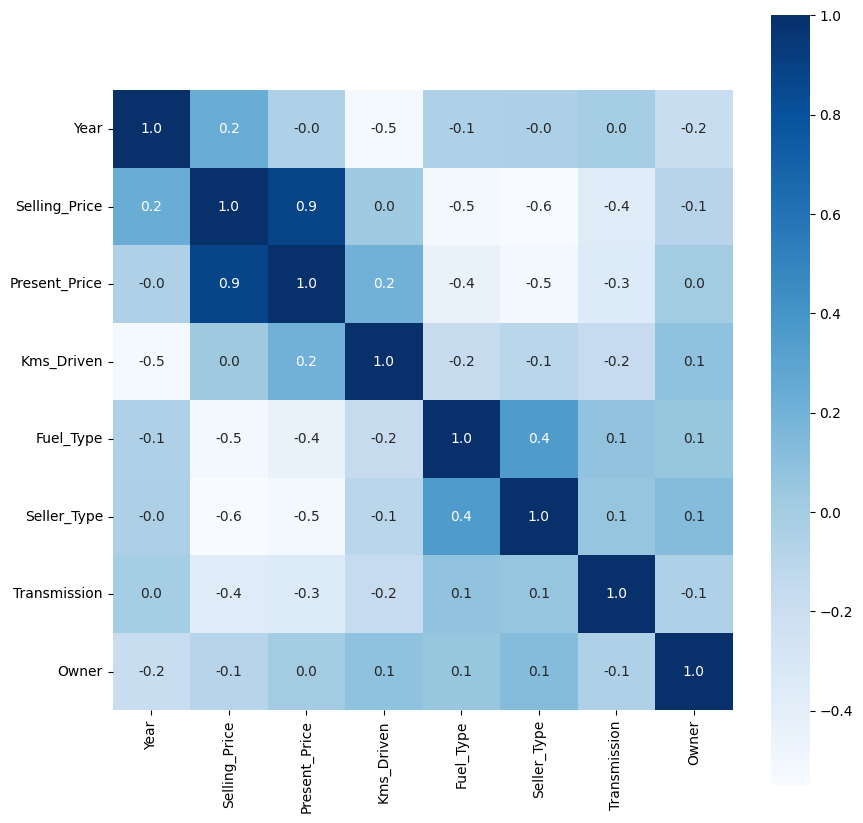

None


In [15]:
print(model.Analysis_HeatMap(data))

------------- Box Plot For Data ------------ 



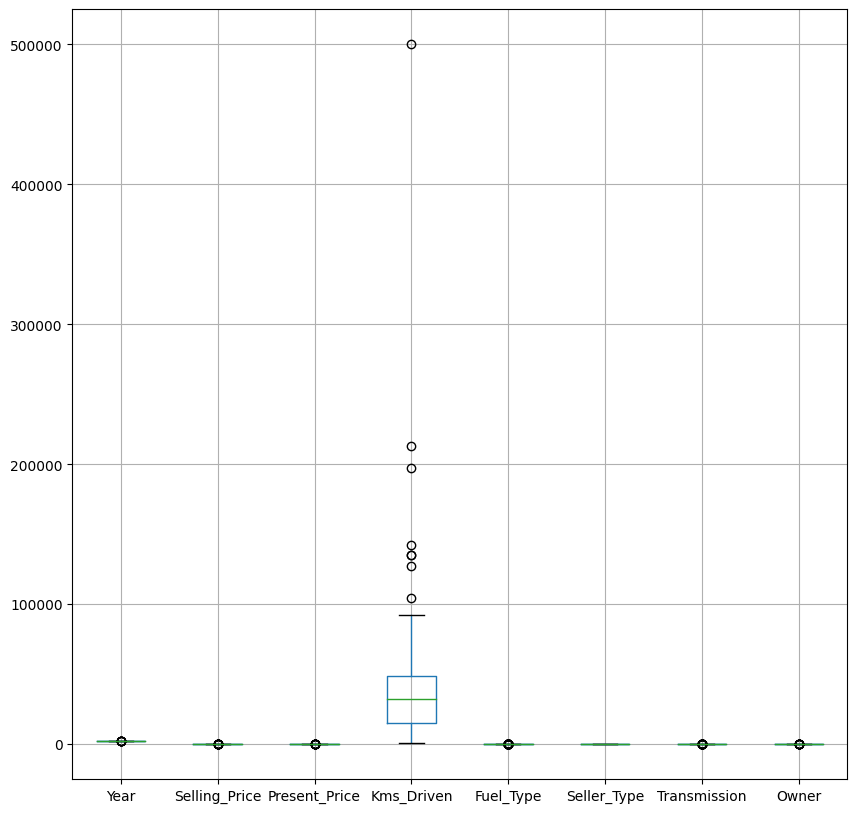

None


In [16]:
print(model.Box_plot(data))

In [17]:
print(model.Histogram_Hisplot(data))

------------- Histogram And Distplot For Data ------------ 




KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000002702F3000D0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x000002703C7FC280> (for post_execute):



KeyboardInterrupt



------------- Histogram And Distplot For Data ------------ 



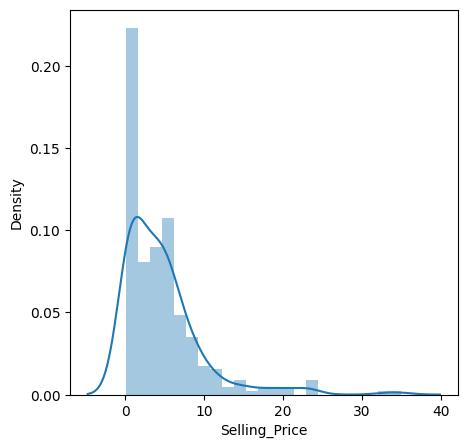

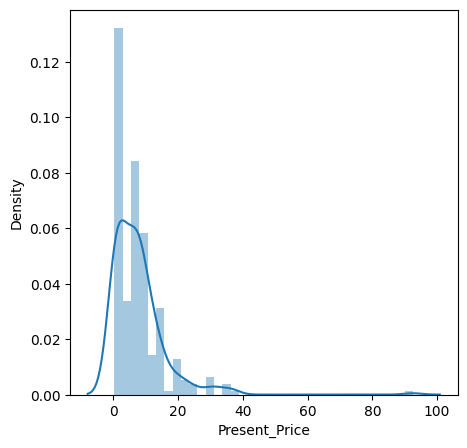

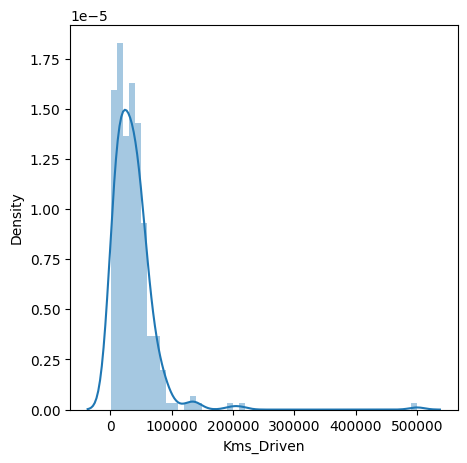

None


In [18]:
print(model.Histogram_Histplot_Density(data))

In [19]:
data = model.Make_LogTransform(data, ["Kms_Driven"])

------------- Histogram And Distplot For Data ------------ 



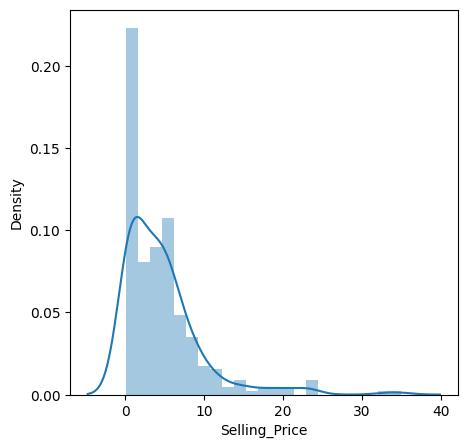

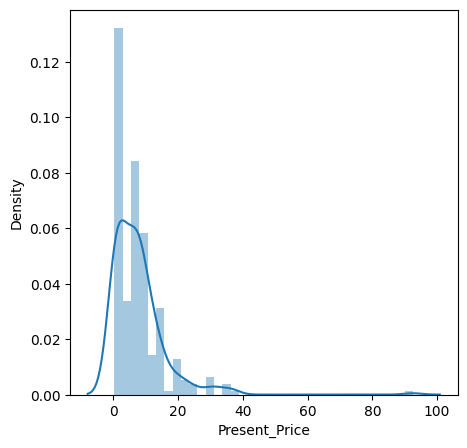

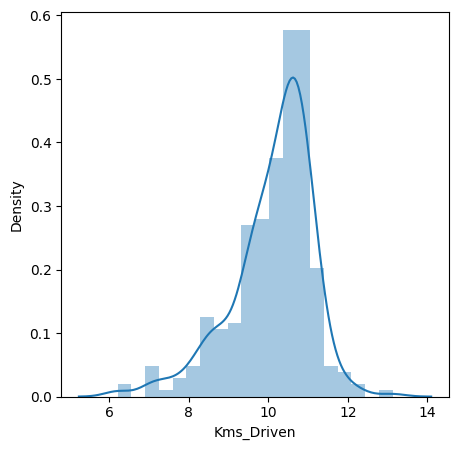

None


In [20]:
# x_train, x_test, y_train, y_test = model.Feature_Scalling_MinMax(data)
print(model.Histogram_Histplot_Density(data))

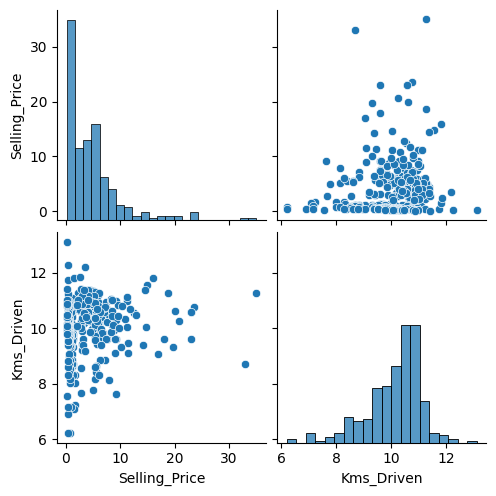

In [21]:
model.Pair_Plot(data, "Selling_Price", "Kms_Driven")

In [22]:
x_train, x_test, y_train, y_test = model.Feature_Scalling(data)

In [23]:
model.Evalution_data(data=data, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test )

--------------- ^ The Model Is Regression ^------------------------ 

The predict Score Train in -SGD- is ==> 0.876361365329724
The predict Score Test in -SGD- is ==> 0.8745132020796247

------------------------------ 

The Accuracy Score Of Train Model in -RandomForestRegressor- is 0.9812253004633644 
The Accuracy Score Of Test Model in -RandomForestRegressor- is 0.9583574750709467 

------------------------------ 

The predict Score Train in -XGBRegressor- is ==> 0.999999974026856
The predict Score Test in -XGBRegressor- is ==> 0.9616403280489184

------------------------------ 



In [23]:
# model.Make_Prediction(test)

In [18]:
model.Make_Cross_Validation(data, x_train, y_train)

--------------- ^ The Model Is Regression ^------------------------ 

No Cross_Validatoin in Regression Only In Classification


--------------- ^ The Model Is Regression ^------------------------ 

Please Enter The Model I To Make Feature Importance==>: [model_RFR== 0, model_SGD==1, model_xgb==2]0


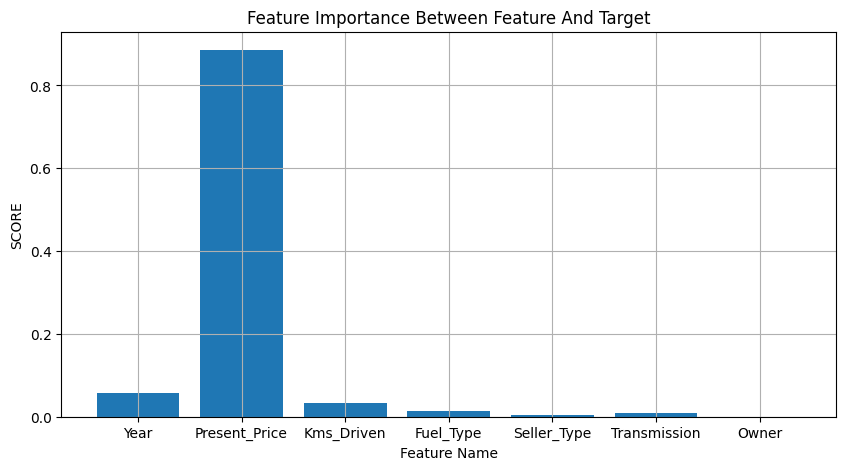

In [19]:
model.Make_FeatureImportance(data)

In [26]:
model.Grid_search(data)

--------------- ^ The Model Is Regression ^------------------------ 

Please Enter The Model I To Make Grid_search==>: [model_RFR== 0, model_xgb==1]0
Fitting 5 folds for each of 250 candidates, totalling 1250 fits
--------------------------------------------------
The Best Param is {'max_depth': 70, 'max_leaf_nodes': 90, 'n_estimators': 10}
--------------------------------------------------
The Accuracy Training Data is 0.979425155607626
The Accuracy Testing Data is 0.9514723571840962


In [27]:
model.Make_NeuralNetwork_Classification(data, x_train, x_test, y_train, y_test)

---------------^ The Model Is Neural Network ^--------------------- 

Epoch 1/30
7/7 [==============================] - 1s 28ms/step - loss: 40.2431 - mae: 4.0973 - val_loss: 36.5740 - val_mae: 3.6697
Epoch 2/30
7/7 [==============================] - 0s 5ms/step - loss: 23.7893 - mae: 2.7906 - val_loss: 18.8832 - val_mae: 2.5537
Epoch 3/30
7/7 [==============================] - 0s 5ms/step - loss: 14.8969 - mae: 2.1504 - val_loss: 12.5782 - val_mae: 2.1693
Epoch 4/30
7/7 [==============================] - 0s 5ms/step - loss: 10.9454 - mae: 1.7506 - val_loss: 8.6799 - val_mae: 1.7238
Epoch 5/30
7/7 [==============================] - 0s 5ms/step - loss: 9.0023 - mae: 1.4413 - val_loss: 6.3256 - val_mae: 1.4794
Epoch 6/30
7/7 [==============================] - 0s 5ms/step - loss: 6.8255 - mae: 1.2838 - val_loss: 4.6352 - val_mae: 1.2907
Epoch 7/30
7/7 [==============================] - 0s 5ms/step - loss: 5.2992 - mae: 1.1119 - val_loss: 4.0267 - val_mae: 1.4525
Epoch 8/30
7/7 [==========

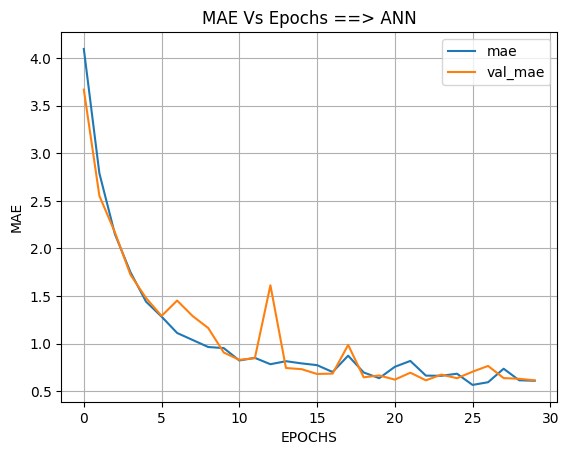

--------------------------------------------------


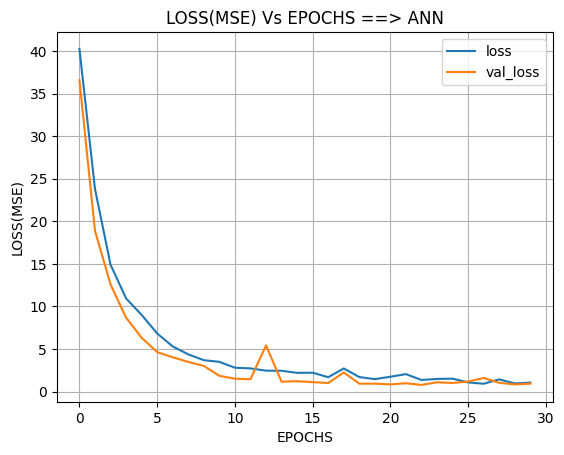

In [20]:
model.Make_NeuralNetwork_Regression(data, x_train, x_test, y_train, y_test)

---------------^ The Model Is Neural Network ^--------------------- 


 -------------------------------------------------- 

Epoch 1/100
7/7 [==============================] - 4s 77ms/step - loss: 45.2701 - mae: 4.5548 - val_loss: 51.5539 - val_mae: 4.8069
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 44.2840 - mae: 4.4539 - val_loss: 48.9865 - val_mae: 4.5655
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 39.3573 - mae: 4.0745 - val_loss: 34.9346 - val_mae: 3.9164
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 25.2761 - mae: 3.6057 - val_loss: 24.1662 - val_mae: 3.6995
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 23.0527 - mae: 3.3878 - val_loss: 22.7348 - val_mae: 3.4583
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 18.3803 - mae: 3.1052 - val_loss: 19.3656 - val_mae: 3.2662
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 15.3690 - m

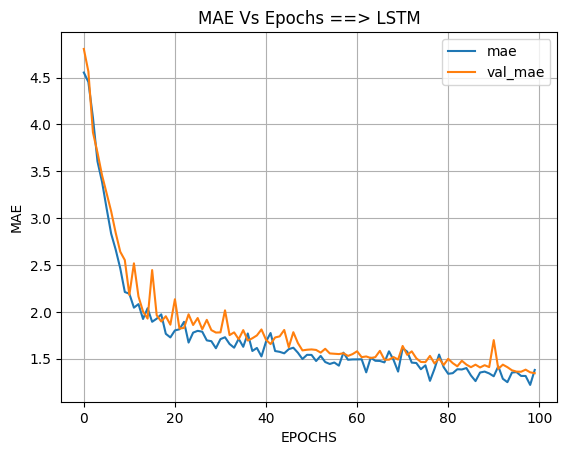

--------------------------------------------------


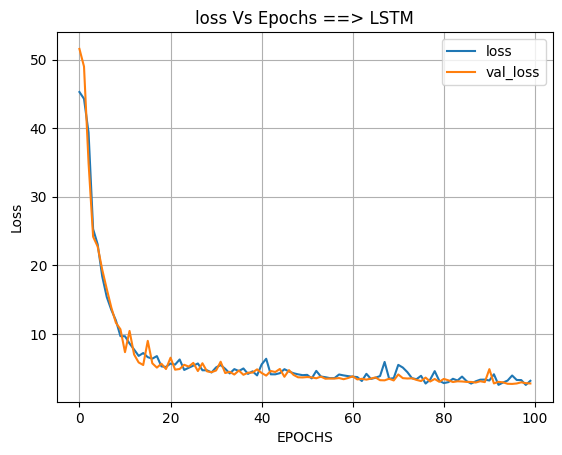

In [21]:
model.Make_NeuralNetwork_LSTM_Regression(data, x_train, x_test, y_train, y_test)

---------------^ The Model Is Neural Network ^--------------------- 


 -------------------------------------------------- 

Epoch 1/100
7/7 [==============================] - 2s 40ms/step - loss: 43.1818 - mae: 4.4247 - val_loss: 43.5252 - val_mae: 4.2257
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 31.0062 - mae: 3.5558 - val_loss: 27.6784 - val_mae: 3.4576
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 22.7075 - mae: 3.0872 - val_loss: 25.0188 - val_mae: 3.3742
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 19.9426 - mae: 2.7206 - val_loss: 20.8106 - val_mae: 2.4768
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 16.5830 - mae: 1.9617 - val_loss: 18.1573 - val_mae: 2.1796
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 14.9010 - mae: 1.7636 - val_loss: 16.4431 - val_mae: 1.9072
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 13.9554 - mae: 1.

Epoch 63/100
7/7 [==============================] - 0s 6ms/step - loss: 4.2686 - mae: 0.5900 - val_loss: 3.2548 - val_mae: 0.8238
Epoch 64/100
7/7 [==============================] - 0s 6ms/step - loss: 4.2226 - mae: 0.6000 - val_loss: 3.3150 - val_mae: 0.9700
Epoch 65/100
7/7 [==============================] - 0s 6ms/step - loss: 4.2400 - mae: 0.6460 - val_loss: 3.0991 - val_mae: 0.8772
Epoch 66/100
7/7 [==============================] - 0s 6ms/step - loss: 4.0977 - mae: 0.5695 - val_loss: 2.9927 - val_mae: 0.8188
Epoch 67/100
7/7 [==============================] - 0s 6ms/step - loss: 4.0405 - mae: 0.5577 - val_loss: 2.9609 - val_mae: 0.8249
Epoch 68/100
7/7 [==============================] - 0s 6ms/step - loss: 3.9871 - mae: 0.5590 - val_loss: 2.9676 - val_mae: 0.9062
Epoch 69/100
7/7 [==============================] - 0s 6ms/step - loss: 3.9756 - mae: 0.5858 - val_loss: 2.9090 - val_mae: 0.8992
Epoch 70/100
7/7 [==============================] - 0s 6ms/step - loss: 3.9156 - mae: 0.58

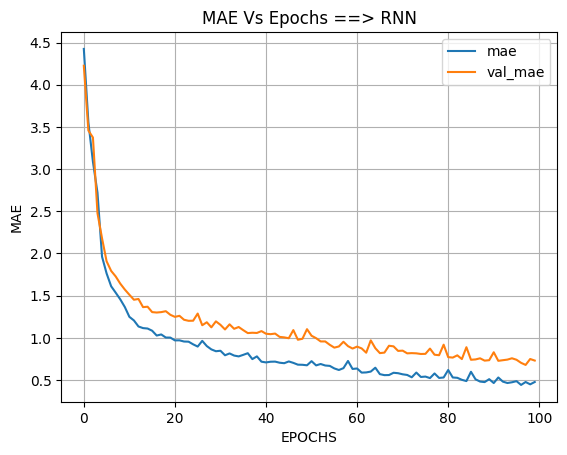

--------------------------------------------------


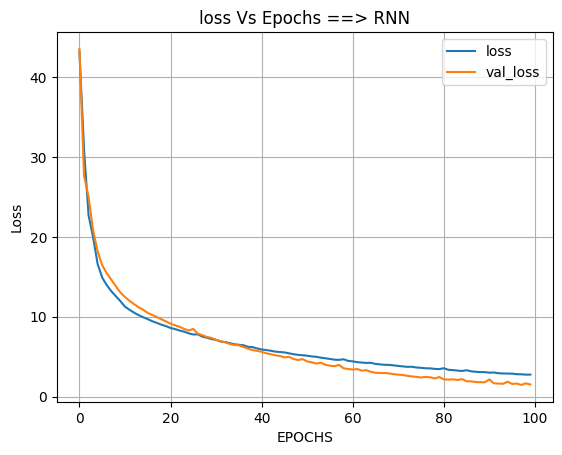

In [30]:
model.Make_NeuralNetwork_RNN_Regression(data, x_train, x_test, y_train, y_test)

In [9]:
path = r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Mall Customer Segmentation Data\Mall_Customers.csv"
model2 = Build_Model_UnSupervised_ML(path=path)

In [10]:
data = model2.Reading_Data()

data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
model2.Drop_Columns_Increase(data)

Name of columns: 


------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
data = model2.Drop_columns(data)

CustomerID


In [13]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [14]:
data = model2.Make_Label_Encoder(data)

In [15]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [16]:
data = model2.PCA(data, 2)

The Dimaintion Reduce From 4 To ==> 2


In [17]:
data

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878330e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

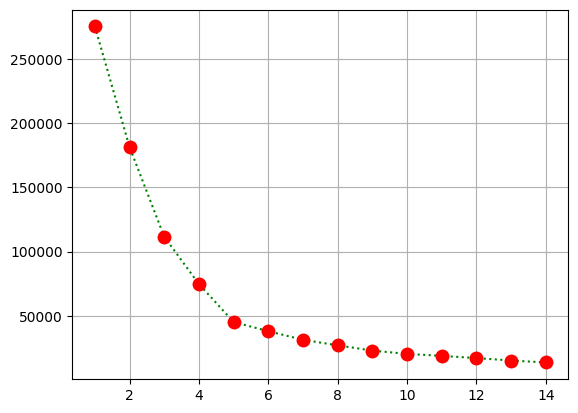

In [18]:
model2.Make_Clustring_For_Data(data, n_cluster=15)

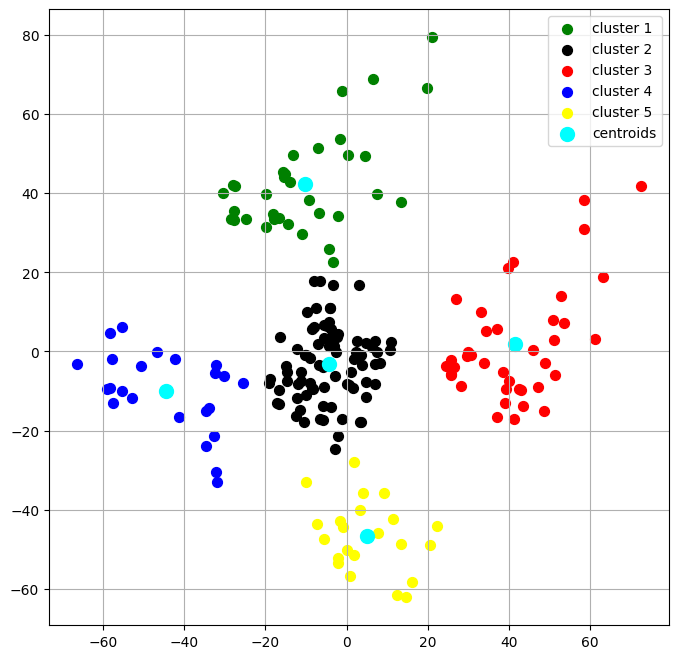

In [25]:
model2.visualize_Cluster_data(data,num_cluster=5)